In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle
import cv2
import numpy as np
import csv

In [65]:
# Load the dataset
data = pd.read_csv("leaf_features.csv")

In [66]:
data = data.drop(columns=['Image Name'])

In [67]:
data

,Weight,Leaf Count,Leaf Area Covered
0,0.1125,7,9755.5
1,0.1652,6,9569.0
2,0.1250,11,11585.5
3,0.0663,4,4089.0
4,0.1813,10,18733.0
...,...,...,...
544,0.0152,5,10566.5
545,0.1295,11,12447.5
546,0.1104,7,18210.0
547,0.1432,11,22283.5


In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[["Leaf Count", "Leaf Area Covered"]], data["Weight"], test_size=0.1, random_state=42)

In [69]:
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 3, 4, 5, 6]
}

In [70]:
# # Create a Random Forest regressor model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [71]:
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20, 50],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [500, 1000, 1500]},
             scoring='neg_mean_squared_error')

In [72]:
# Get the best model and its hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

In [73]:
# Train the best model on the entire training set
# rf.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=6, n_estimators=1000,
                      random_state=42)

In [74]:
# Save the trained model to a file
filename = 'rf_model_new.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [75]:
# Predict the biomass for the test set using the best model
y_pred = best_rf.predict(X_test)

In [76]:
# Compute R^2 score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [77]:
# Print the best hyperparameters, R^2 score, and mean squared error
print("Best Hyperparameters:", best_params)
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 1000}
R^2 Score: 0.240
Mean Squared Error: 0.002


In [78]:
(np.sum(y_pred)/np.sum(y_test))*100

99.58888652612039

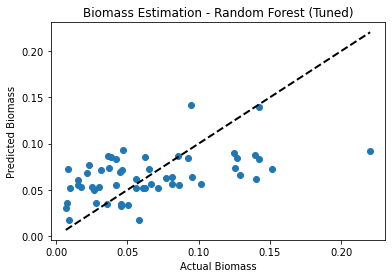

In [79]:
# Plot the actual biomass values and predicted biomass values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Biomass')
plt.ylabel('Predicted Biomass')
plt.title('Biomass Estimation - Random Forest (Tuned)')
plt.show()

In [80]:
# # Load the trained RF model from file
# model = pickle.load(open('rf_model_new.pkl', 'rb'))

In [81]:
# # Preprocess the input image
# def preprocess_image(image):
#     # Resize the image
#     desired_width = 224
#     desired_height = 224
#     resized_image = cv2.resize(image, (desired_width, desired_height))

#     # Convert the image to 8-bit unsigned integer
#     if resized_image.dtype != 'uint8':
#         resized_image = resized_image.astype('uint8')

#     # Check if the image has only one channel (grayscale)
#     if len(resized_image.shape) == 2:
#         # Convert grayscale image to RGB
#         resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

#     # Normalize pixel values
#     normalized_image = resized_image / 255.0

#     return normalized_image

In [82]:
# def extract_leaf_features(image_path):
#     # Load the image
#     image = cv2.imread(image_path)

#     # Convert the image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Perform thresholding to separate the leaves from the background
#     _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#     # Find contours of the leaves
#     contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Initialize lists to store leaf count and leaf length features
#     leaf_count = len(contours)
#     leaf_lengths = []

#     # Calculate leaf length for each contour
#     for contour in contours:
#         # Calculate the length of the leaf contour using arc length
#         length = cv2.arcLength(contour, True)
#         leaf_lengths.append(length)

#     # Export the features to a CSV file
#     csv_file = "leaf_features.csv"
#     with open(csv_file, 'w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(["Leaf_Count", "Leaf_Length"])
#         writer.writerow([leaf_count, *leaf_lengths])

#     print("Leaf features exported to:", csv_file)

#     return leaf_count, leaf_lengths, thresholded

In [83]:
# def extract_leaf_features(image_path):
#     # Load the image
#     image = cv2.imread(image_path)

#     # image = cv2.imread(image_path)

#     # # Get the dimensions of the image
#     # height, width, _ = image.shape

#     # # Define the coordinates of the middle region
#     # margin = 500  # Adjust this value as per your requirements
#     # top = margin//100
#     # bottom = height - margin
#     # left = margin
#     # right = width - (margin)

#     # # Crop the middle region of the image
#     # cropped_image = image[top:bottom, left:right]

#     # Convert the cropped image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Perform adaptive thresholding to obtain a binary image
#     thresholded = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

#     # Find contours of the leaves
#     contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Initialize variables to store leaf count and leaf area
#     leaf_count = 0
#     leaf_area = 0

#     # Calculate leaf count and area for each contour
#     for contour in contours:
#         # Approximate the contour to reduce the number of points
#         epsilon = 0.06 * cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, epsilon, True)

#         # Exclude contours with very small areas
#         if cv2.contourArea(approx) > 350:
#             leaf_count += 1
#             leaf_area += cv2.contourArea(approx)

#     #Export the features to a CSV file
#     csv_file = "leaf_features.csv"
#     with open(csv_file, 'w', newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(["Leaf_Count", "leaf_area"])
#         writer.writerow([leaf_count, leaf_area])

#     print("Leaf features exported to:", csv_file)

#     # Return the leaf count and leaf area
#     return leaf_count, leaf_area, thresholded

In [84]:
# def extract_leaf_features(image_path, one_leaf_length):
#     # Load the image
#     image = cv2.imread(image_path)

#     # Convert the image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Perform thresholding to obtain a binary image
#     _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#     # Find contours of the leaves
#     contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Initialize variables to store leaf count and leaf coverage area
#     leaf_count = 0
#     leaf_area = 0

#     # Calculate leaf count and area for each contour
#     for contour in contours:
#         # Calculate the area of the contour
#         area = cv2.contourArea(contour)
#         leaf_area += area

#         # Calculate the length of the contour using arc length
#         length = cv2.arcLength(contour, True)

#         # Calculate the number of leaves based on the reference length
#         num_leaves = length / one_leaf_length
#         leaf_count += num_leaves

#     return leaf_count, leaf_area, thresholded

In [85]:
# image_path = "../images/cropped/77_3.jpg"

In [86]:
# one_leaf_length = 4

In [87]:
# leaf_count, leaf_area, thresholded = extract_leaf_features(image_path)

In [88]:
# # Display the thresholded image
# plt.imshow(thresholded, cmap='gray')
# plt.axis('off')
# plt.show()

In [89]:
# print("Leaf Count:", leaf_count)
# print("Leaf Area:", leaf_area)

In [90]:
# # Load the leaf features from the CSV file
# leaf_features = pd.read_csv("leaf_features.csv")

In [91]:
# # Select the first two columns (leaf count and leaf lengths)
# X_pred = leaf_features.iloc[:, :2]

In [92]:
# X_pred

In [93]:
# # Predict the biomass using the RF model
# biomass_pred = model.predict(X_pred)

In [94]:
# # Print the predicted biomass
# print("Predicted Biomass:", biomass_pred)